In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os

In [3]:
os.chdir('C:/Users/Evangelina Garza/Documents/CIMAT/MCE_2Semestre/Ciencia de Datos/Tarea5')

In [4]:
diabetes=pd.read_csv('diabetes.csv')

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.shape

(768, 9)

In [7]:
X_pd=diabetes.drop(['Diabetes'], axis = 'columns', inplace=False)
X=X_pd.to_numpy()

In [8]:
Y_pd=diabetes['Diabetes']
Y=Y_pd.to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42,shuffle=True)

## Implementacion Algoritmo Perceptron

In [10]:
def my_pa(X,y,a,nit):
    n=y.shape[0]

    #Inicializamos el vector Beta y el intercepto B0
    Beta=np.zeros(X.shape[1])
    B0=0
    
    #El algoritmo corre el numero de iteraciones que se les indica
    for j in range(nit):
        for i in range(n):
            if y[i]==1.0 and (np.dot(X[i],Beta)+B0)<0:
                Beta=Beta+(a*X[i])
                B0=B0+(a*y[i])
            elif y[i]==0.0 and (np.dot(X[i],Beta)+B0)>=0:
                Beta=Beta-(a*X[i])
                B0=B0-(a*y[i])
    
    #Regresa el vector e intercepto que definen el hiperplano separador
    return Beta,B0

In [11]:
beta,beta0=my_pa(X_train,y_train,1,1000)

In [12]:
y_pa=np.dot(X_test,beta)+beta0

In [13]:
y_pa_train=np.dot(X_train,beta)+beta0

In [14]:
n=y_train.shape[0]
nn=y_test.shape[0]

for i in range(n):
    if y_pa_train[i]<0:
        y_pa_train[i]=0
    else:
        y_pa_train[i]=1


for j in range(nn):
    if y_pa[j]<0:
        y_pa[j]=0
    else:
        y_pa[j]=1

In [15]:
error=0

for i in range(n):
    if y_pa_train[i]!=y_train[i]:
        error=error+1

print('Error de entrenamiento')
print((error/n)*100)

Error de entrenamiento
41.527001862197395


In [16]:
error=0

for i in range(nn):
    if y_pa[i]!=y_test[i]:
        error=error+1

print('Error de prueba')
print((error/nn)*100)

Error de prueba
37.66233766233766


## Perceptron Model from SKLEARN

In [17]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
y_per_train=clf.predict(X_train)
y_per=clf.predict(X_test)

In [19]:
print('Error de Entrenamiento')
print(100*(clf.score(X_train, y_train)))

Error de Entrenamiento
47.486033519553075


In [20]:
print('Error de Prueba')
print(100*(clf.score(X_test, y_test)))

Error de Prueba
49.35064935064935


## Regresión Logistica

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_lr_train = lr.predict(X_train)
y_lr=lr.predict(X_test)

In [23]:
print('Error de Entrenamiento')
print(100*(1-lr.score(X_train, y_train)))

Error de Entrenamiento
21.601489757914337


In [24]:
print('Error de Prueba')
print(100*(1-lr.score(X_test, y_test)))

Error de Prueba
26.406926406926413


## LDA & QDA

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [26]:
y_lda_train = lda.predict(X_train)
y_lda=lda.predict(X_test)

In [27]:
print('Error de Entrenamiento')
print(100*(1-lda.score(X_train, y_train)))

Error de Entrenamiento
22.160148975791436


In [28]:
print('Error de Prueba')
print(100*(1-lda.score(X_test, y_test)))

Error de Prueba
26.83982683982684


In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
QuadraticDiscriminantAnalysis()

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [30]:
y_qda_train = qda.predict(X_train)
y_qda=qda.predict(X_test)

In [31]:
print('Error de Entrenamiento')
print(100*(1-qda.score(X_train, y_train)))

Error de Entrenamiento
23.463687150837988


In [32]:
print('Error de Prueba')
print(100*(1-qda.score(X_test, y_test)))

Error de Prueba
23.376623376623375


## ROC Curves

In [33]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [34]:
fpr_pa, tpr_pa, thresholds_pa = roc_curve(y_test, y_pa)

In [35]:
fpr_per, tpr_per, thresholds_per = roc_curve(y_test, y_per, pos_label=1)

In [36]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_lr, pos_label=1)

In [37]:
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_lda, pos_label=1)

In [38]:
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, y_lda, pos_label=1)

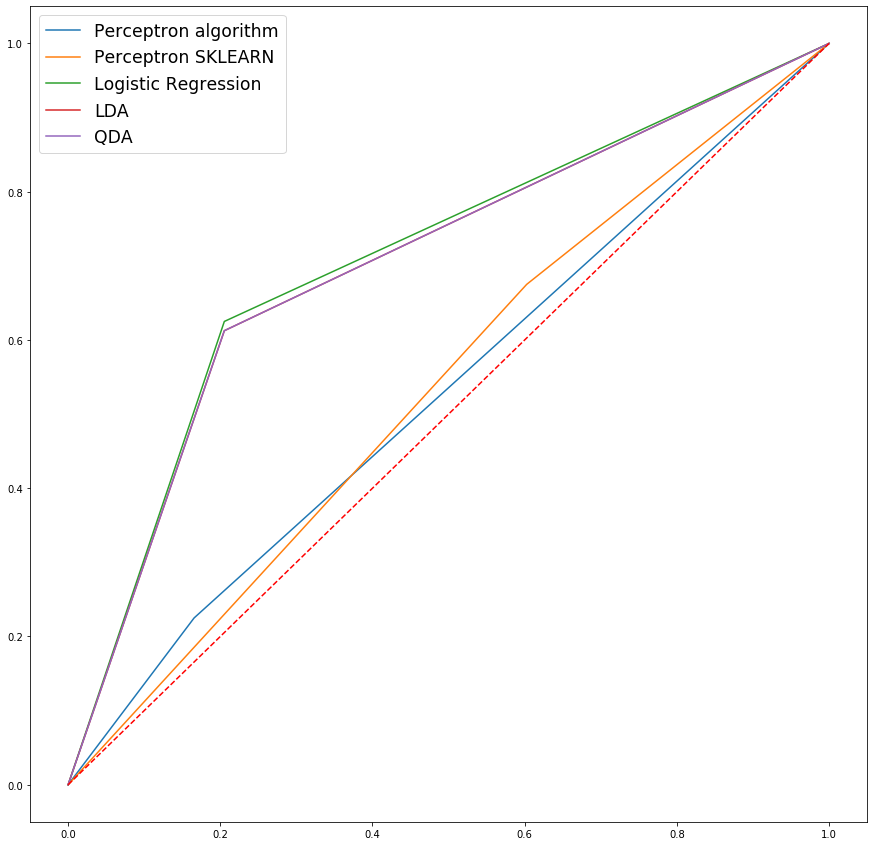

In [39]:
plt.figure(figsize=(15,15))
plt.plot(fpr_pa,tpr_pa,label='Perceptron algorithm')
plt.plot(fpr_per,tpr_per,label='Perceptron SKLEARN')
plt.plot(fpr_lr,tpr_lr,label='Logistic Regression')
plt.plot(fpr_lda,tpr_lda,label='LDA')
plt.plot(fpr_qda,tpr_qda,label='QDA')
plt.plot(np.array([0,1]),np.array([0,1]),'--r')
plt.legend(fontsize='xx-large')
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score

auc_pa=roc_auc_score(y_test, y_pa)
auc_per=roc_auc_score(y_test, y_per)
auc_lr=roc_auc_score(y_test, y_lr)
auc_lda=roc_auc_score(y_test, y_lda)
auc_qda=roc_auc_score(y_test, y_qda)

In [50]:
#AUC Perceptron
auc_pa

0.5297185430463577

In [52]:
#AUC Perceptron SKLEARN
auc_per

0.5361754966887418

In [53]:
#AUC Regresion logistica
auc_lr

0.7098509933774835

In [54]:
#AUC LDA
auc_lda

0.7036009933774836

In [55]:
#AUC QDA
auc_qda

0.7477235099337749